In [100]:
from __future__ import print_function, division
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from fancyimpute import KNN, SoftImpute

#%matplotlib inline

# Eksperimen


1. Impute all variable 
2. Implement Normalitation to variable 'age' and 'MonthlyIncome'
3. Given this case linier or nonlinier
4. Traing using algorithm resolve linier case if this case linier or algorithm resolve nonlinier if this case non linier
5. Do Hyper Parameter Tuning


## Load Data Train and Data Test

In [101]:
training_dataset = pd.read_csv('cs-training.csv', delimiter = ',').drop('Unnamed: 0', axis = 1)
test_dataset = pd.read_csv('cs-test.csv', delimiter = ',').drop('Unnamed: 0', axis = 1)
print("Dataset Size")
print("Training Size : {}".format(training_dataset.shape))
print("Test Size : {}".format(test_dataset.shape))

Dataset Size
Training Size : (150000, 11)
Test Size : (101503, 11)


In [38]:
training_dataset.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [39]:
test_dataset.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
5,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
6,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
7,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
8,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
9,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [40]:
training_dataset.tail(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149990,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [41]:
test_dataset.tail(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101493,NaN,0.035549,58,0,0.290323,11128.0,7,0,2,0,2.0
101494,NaN,0.218356,56,0,0.295803,1500.0,3,0,0,0,0.0
101495,NaN,0.718874,35,1,0.308047,4125.0,8,0,0,1,2.0
101496,NaN,0.021654,78,0,18.000000,NaN,8,0,0,0,0.0
101497,NaN,0.045230,67,0,0.012198,5000.0,4,0,0,0,0.0
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0
101502,NaN,0.441842,29,0,0.198918,5916.0,12,0,0,0,0.0


## Data Prepocessing

### Impute to All variable

#### Data train impute

In [102]:
training_dataset.iloc[:,1:] = SoftImpute().complete(training_dataset.iloc[:,1:])
training_dataset = training_dataset.round({'age': 0, 'NumberOfTime30-59DaysPastDueNotWorse': 0, 'NumberOfOpenCreditLinesAndLoans':0,
                            'NumberOfTimes90DaysLate':0, 'NumberRealEstateLoansOrLines':0, 'NumberOfTime60-89DaysPastDueNotWorse':0,
                            'NumberOfDependents':0})

[SoftImpute] Max Singular Value of X_init = 5498797.118077
[SoftImpute] Iter 1: observed MAE=22.144330 rank=2


C:\Users\Dian\Anaconda3\lib\site-packages\fancyimpute-0.3.1-py3.6.egg\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars


[SoftImpute] Iter 2: observed MAE=22.144389 rank=2
[SoftImpute] Iter 3: observed MAE=22.144398 rank=2
[SoftImpute] Iter 4: observed MAE=22.144402 rank=2
[SoftImpute] Iter 5: observed MAE=22.144406 rank=2
[SoftImpute] Iter 6: observed MAE=22.144409 rank=2
[SoftImpute] Iter 7: observed MAE=22.144413 rank=2
[SoftImpute] Iter 8: observed MAE=22.144416 rank=2
[SoftImpute] Iter 9: observed MAE=22.144420 rank=2
[SoftImpute] Iter 10: observed MAE=22.144423 rank=2
[SoftImpute] Iter 11: observed MAE=22.144426 rank=2
[SoftImpute] Iter 12: observed MAE=22.144429 rank=2
[SoftImpute] Iter 13: observed MAE=22.144432 rank=2
[SoftImpute] Iter 14: observed MAE=22.144435 rank=2
[SoftImpute] Iter 15: observed MAE=22.144438 rank=2
[SoftImpute] Iter 16: observed MAE=22.144441 rank=2
[SoftImpute] Iter 17: observed MAE=22.144444 rank=2
[SoftImpute] Iter 18: observed MAE=22.144447 rank=2
[SoftImpute] Iter 19: observed MAE=22.144450 rank=2
[SoftImpute] Iter 20: observed MAE=22.144452 rank=2
[SoftImpute] Iter 21

In [103]:
training_dataset = training_dataset[training_dataset.age != 0]
training_dataset = training_dataset.reset_index()

In [44]:
training_dataset.head(10)

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.000000,7.0,0.0,1.0,0.0,0.0
5,5,0,0.213179,74.0,0.0,0.375607,3500.000000,3.0,0.0,1.0,0.0,1.0
6,6,0,0.305682,57.0,0.0,5710.000000,2.323121,8.0,0.0,3.0,0.0,0.0
7,7,0,0.754464,39.0,0.0,0.209940,3500.000000,8.0,0.0,0.0,0.0,0.0
8,8,0,0.116951,27.0,0.0,46.000000,1.611424,2.0,0.0,0.0,0.0,0.0
9,9,0,0.189169,57.0,0.0,0.606291,23684.000000,9.0,0.0,4.0,0.0,2.0


#### Data Test Impute

In [104]:
test_dataset.iloc[:,1:] = SoftImpute().complete(test_dataset.iloc[:,1:])
test_dataset = test_dataset.round({'age': 0, 'NumberOfTime30-59DaysPastDueNotWorse': 0, 'NumberOfOpenCreditLinesAndLoans':0,
                            'NumberOfTimes90DaysLate':0, 'NumberRealEstateLoansOrLines':0, 'NumberOfTime60-89DaysPastDueNotWorse':0,
                            'NumberOfDependents':0})

[SoftImpute] Max Singular Value of X_init = 10598115.191638
[SoftImpute] Iter 1: observed MAE=32.035881 rank=2


C:\Users\Dian\Anaconda3\lib\site-packages\fancyimpute-0.3.1-py3.6.egg\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars


[SoftImpute] Iter 2: observed MAE=32.035890 rank=2
[SoftImpute] Iter 3: observed MAE=32.035891 rank=2
[SoftImpute] Iter 4: observed MAE=32.035891 rank=2
[SoftImpute] Iter 5: observed MAE=32.035891 rank=2
[SoftImpute] Iter 6: observed MAE=32.035891 rank=2
[SoftImpute] Iter 7: observed MAE=32.035892 rank=2
[SoftImpute] Iter 8: observed MAE=32.035892 rank=2
[SoftImpute] Iter 9: observed MAE=32.035892 rank=2
[SoftImpute] Iter 10: observed MAE=32.035893 rank=2
[SoftImpute] Iter 11: observed MAE=32.035893 rank=2
[SoftImpute] Iter 12: observed MAE=32.035893 rank=2
[SoftImpute] Iter 13: observed MAE=32.035893 rank=2
[SoftImpute] Iter 14: observed MAE=32.035894 rank=2
[SoftImpute] Iter 15: observed MAE=32.035894 rank=2
[SoftImpute] Iter 16: observed MAE=32.035894 rank=2
[SoftImpute] Iter 17: observed MAE=32.035894 rank=2
[SoftImpute] Iter 18: observed MAE=32.035894 rank=2
[SoftImpute] Iter 19: observed MAE=32.035895 rank=2
[SoftImpute] Iter 20: observed MAE=32.035895 rank=2
[SoftImpute] Iter 21

In [47]:
test_dataset.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43.0,0.0,0.177513,5700.000000,4.0,0.0,0.0,0.0,0.0
1,NaN,0.463295,57.0,0.0,0.527237,9141.000000,15.0,0.0,4.0,0.0,2.0
2,NaN,0.043275,59.0,0.0,0.687648,5083.000000,12.0,0.0,1.0,0.0,2.0
3,NaN,0.280308,38.0,1.0,0.925961,3200.000000,7.0,0.0,2.0,0.0,0.0
4,NaN,1.000000,27.0,0.0,0.019917,3865.000000,4.0,0.0,0.0,0.0,1.0
5,NaN,0.509791,63.0,0.0,0.342429,4140.000000,4.0,0.0,0.0,0.0,1.0
6,NaN,0.587778,50.0,0.0,1048.000000,0.000000,5.0,0.0,0.0,0.0,3.0
7,NaN,0.046149,79.0,1.0,0.369170,3301.000000,8.0,0.0,1.0,0.0,1.0
8,NaN,0.013527,68.0,0.0,2024.000000,0.725155,4.0,0.0,1.0,0.0,0.0
9,NaN,1.000000,23.0,98.0,0.000000,0.000000,0.0,98.0,0.0,98.0,0.0


### Normalitation Variable age and MonthlyIncome

#### Scalling variable age and MonthlyIncome

In [105]:
scaler = StandardScaler()
train_size = training_dataset.values.shape[0]
test_size = test_dataset.values.shape[0]
training_dataset['age'] = scaler.fit_transform(training_dataset['age'].values.reshape([train_size,-1]))
test_dataset['age'] = scaler.transform(test_dataset['age'].values.reshape([test_size,-1]))
scaler = StandardScaler()
training_dataset['MonthlyIncome'] = scaler.fit_transform(training_dataset['MonthlyIncome'].values.reshape([train_size,-1]))
test_dataset['MonthlyIncome'] = scaler.transform(test_dataset['MonthlyIncome'].values.reshape([test_size,-1]))
scaler = StandardScaler()
training_dataset['DebtRatio'] = scaler.fit_transform(training_dataset['DebtRatio'].values.reshape([train_size,-1]))
test_dataset['DebtRatio'] = scaler.transform(test_dataset['DebtRatio'].values.reshape([test_size,-1]))

In [106]:
training_dataset.head(10)

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,-0.493902,2.0,-0.172834,0.286747,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,-0.832398,0.0,-0.173168,-0.209003,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,-0.967796,1.0,-0.173186,-0.175395,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,-1.509389,0.0,-0.173210,-0.155778,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,-0.223106,1.0,-0.173216,4.428232,7.0,0.0,1.0,0.0,0.0
5,5,0,0.213179,1.469371,0.0,-0.173044,-0.140571,3.0,0.0,1.0,0.0,1.0
6,6,0,0.305682,0.318487,0.0,2.628788,-0.406517,8.0,0.0,3.0,0.0,0.0
7,7,0,0.754464,-0.900097,0.0,-0.173125,-0.140571,8.0,0.0,0.0,0.0,0.0
8,8,0,0.116951,-1.712486,0.0,-0.150655,-0.406572,2.0,0.0,0.0,0.0,0.0
9,9,0,0.189169,0.318487,0.0,-0.172931,1.394124,9.0,0.0,4.0,0.0,2.0


### Split Data

In [120]:
X = ['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_train = training_dataset[X].values
Y_train = training_dataset[['SeriousDlqin2yrs']].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train, test_size = 0.2, random_state = 0)
X_test = test_dataset[X].values

In [121]:
print("Ukuran X_train : ",X_train.shape)
print("Ukuran Y_train : ",Y_train.shape)
print("Ukuran X_test  : ",X_test.shape)
print("Ukuran X_val   : ",X_validation.shape)
print("ukuran Y_val   : ",Y_validation.shape)

Ukuran X_train :  (119999, 10)
Ukuran Y_train :  (119999, 1)
Ukuran X_test  :  (101503, 10)
Ukuran X_val   :  (30000, 10)
ukuran Y_val   :  (30000, 1)


### Determine Dataset linier or nonlinier case

In [53]:
from sklearn.svm import SVC
Y_train = Y_train.reshape(-1)
svc_linier = SVC(kernel='linear')
svc_linier.fit(X_train[:5000], Y_train[:5000])
SVC_linier_predict = svc_linier.predict(X_validation)
print(classification_report(Y_validation, SVC_linier_predict, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96     27969
          1       0.39      0.02      0.03      2031

avg / total       0.90      0.93      0.90     30000



In [54]:
from sklearn.svm import SVC
Y_train = Y_train.reshape(-1)
svc_linier = SVC(kernel='rbf')
svc_linier.fit(X_train[:5000], Y_train[:5000])
SVC_linier_predict = svc_linier.predict(X_validation)
print(classification_report(Y_validation, SVC_linier_predict, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97     27969
          1       0.65      0.02      0.04      2031

avg / total       0.91      0.93      0.90     30000



*Linier or Non Linier*
This case is non linier clasification, because prediction using SVM (kernel='rbf') better than SVM (kernel='linier')

## Training

### Deep Learning

#### Shallow Neural Network

In [19]:
model = Sequential()
model.add(Dense(units = 600, input_dim = 10, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
print(X_train.shape[0])
print(X_train.shape[1])
log = model.fit(X_train, Y_train, batch_size= 5000, epochs=20, verbose=1,validation_data=(X_validation, Y_validation))  # starts training
#model = model.fit(X_train, Y_train, epochs=100, batch_size=X_train.shape[0])

119999
10
Train on 119999 samples, validate on 30000 samples
Epoch 1/20
119999/119999 [==============================] - 8s 65us/step - loss: 0.1893 - acc: 0.9371 - val_loss: 0.2022 - val_acc: 0.9353
Epoch 2/20
119999/119999 [==============================] - 5s 44us/step - loss: 0.1893 - acc: 0.9374 - val_loss: 0.2001 - val_acc: 0.9356
Epoch 3/20
119999/119999 [==============================] - 6s 48us/step - loss: 0.1882 - acc: 0.9376 - val_loss: 0.2017 - val_acc: 0.9350
Epoch 4/20
119999/119999 [==============================] - 6s 53us/step - loss: 0.1883 - acc: 0.9377 - val_loss: 0.2032 - val_acc: 0.9354
Epoch 5/20
119999/119999 [==============================] - 6s 53us/step - loss: 0.1877 - acc: 0.9378 - val_loss: 0.1999 - val_acc: 0.9353
Epoch 6/20
119999/119999 [==============================] - 6s 52us/step - loss: 0.1875 - acc: 0.9378 - val_loss: 0.2009 - val_acc: 0.9351
Epoch 7/20
119999/119999 [==============================] - 6s 54us/step - loss: 0.1873 - acc: 0.9378 - v

In [64]:
scores = model.evaluate(X_validation, Y_validation)
print('\n%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))
print('\n%s: %.2f%%'%(model.metrics_names[0], scores[0]*100))


30000/30000 [==============================] - 5s 170us/step

acc: 93.50%

loss: 20.33%


In [68]:
shallow_neural_network_predict = model.predict(X_validation)

In [69]:
print(confusion_matrix(Y_validation, [np.round(pred) for pred in shallow_neural_network_predict]))

[[27752   192     3     1    21     0]
 [ 1699   297     0     0    32     3]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]
 [    0     0     0     0     0     0]]


In [21]:
def plot_accuracy_against_epoch(model):
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.ylim(0, 1)
    plt.show()

# summarize history for loss
def plot_loss_against_epoch(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.ylim(0, 1)
    plt.show()

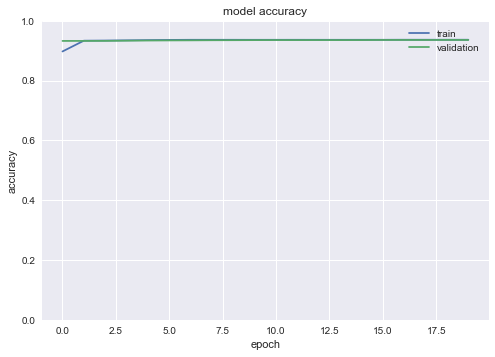

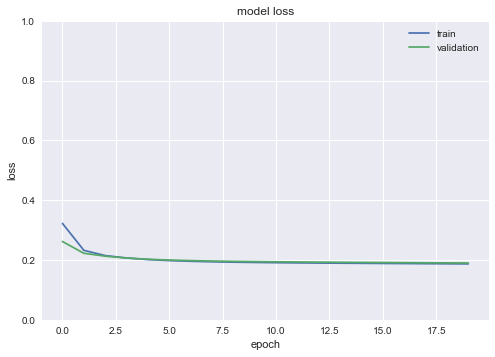

In [22]:
plot_accuracy_against_epoch(log)
plot_loss_against_epoch(log)

#### Deep Neural network

In [71]:
dnn_model = Sequential()
dnn_model.add(Dense(units = 600, input_dim = 10, activation = 'relu'))
dnn_model.add(Dense(units = 300, activation = 'relu'))
dnn_model.add(Dense(units = 100, activation = 'relu'))
dnn_model.add(Dense(units = 1, activation = 'sigmoid'))

dnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

dnn_log = dnn_model.fit(X_train, Y_train, batch_size= 6000, epochs=100, verbose=1,
                validation_data=(X_validation, Y_validation))  # starts training


Train on 119999 samples, validate on 30000 samples
Epoch 1/100
119999/119999 [==============================] - 12s 103us/step - loss: 0.3195 - acc: 0.8923 - val_loss: 0.2602 - val_acc: 0.9327
Epoch 2/100
119999/119999 [==============================] - 6s 48us/step - loss: 0.2254 - acc: 0.9350 - val_loss: 0.2078 - val_acc: 0.9341
Epoch 3/100
119999/119999 [==============================] - 6s 53us/step - loss: 0.1968 - acc: 0.9361 - val_loss: 0.1919 - val_acc: 0.9347
Epoch 4/100
119999/119999 [==============================] - 6s 52us/step - loss: 0.1934 - acc: 0.9360 - val_loss: 0.1925 - val_acc: 0.9347
Epoch 5/100
119999/119999 [==============================] - 6s 52us/step - loss: 0.1870 - acc: 0.9363 - val_loss: 0.1851 - val_acc: 0.9357
Epoch 6/100
119999/119999 [==============================] - 6s 52us/step - loss: 0.1823 - acc: 0.9365 - val_loss: 0.1829 - val_acc: 0.9356
Epoch 7/100
119999/119999 [==============================] - 6s 53us/step - loss: 0.1811 - acc: 0.9369 - va

Epoch 59/100
119999/119999 [==============================] - 6s 54us/step - loss: 0.1749 - acc: 0.9386 - val_loss: 0.1817 - val_acc: 0.9361
Epoch 60/100
119999/119999 [==============================] - 7s 55us/step - loss: 0.1756 - acc: 0.9387 - val_loss: 0.1831 - val_acc: 0.9351
Epoch 61/100
119999/119999 [==============================] - 7s 55us/step - loss: 0.1752 - acc: 0.9389 - val_loss: 0.1819 - val_acc: 0.9363
Epoch 62/100
119999/119999 [==============================] - 7s 57us/step - loss: 0.1745 - acc: 0.9391 - val_loss: 0.1824 - val_acc: 0.9353
Epoch 63/100
119999/119999 [==============================] - 7s 55us/step - loss: 0.1748 - acc: 0.9391 - val_loss: 0.1839 - val_acc: 0.9351
Epoch 64/100
119999/119999 [==============================] - 6s 53us/step - loss: 0.1751 - acc: 0.9391 - val_loss: 0.1820 - val_acc: 0.9354
Epoch 65/100
119999/119999 [==============================] - 7s 54us/step - loss: 0.1749 - acc: 0.9391 - val_loss: 0.1865 - val_acc: 0.9354
Epoch 66/100


In [74]:
scores = dnn_model.evaluate(X_validation, Y_validation)
print('\n%s: %.2f%%'%(model.metrics_names[1], scores[1]*100))
print('\n%s: %.2f%%'%(model.metrics_names[0], scores[0]*100))

30000/30000 [==============================] - 4s 137us/step

acc: 93.49%

loss: 18.58%


In [75]:
deep_neural_network_predict = dnn_model.predict(X_validation)

In [77]:
print(confusion_matrix(Y_validation, [np.round(pred) for pred in deep_neural_network_predict]))

[[27687   282]
 [ 1672   359]]


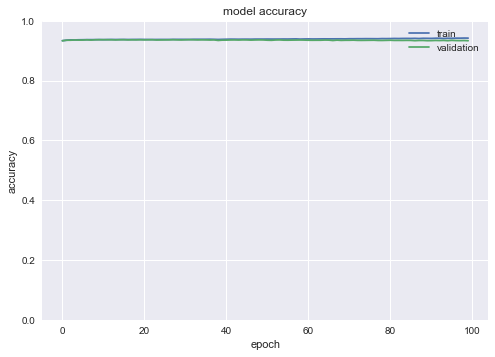

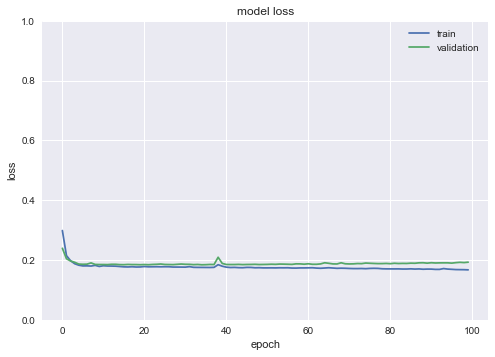

In [44]:
plot_accuracy_against_epoch(log)
plot_loss_against_epoch(log)

In [62]:
X = ['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test = test_dataset[X].values

In [63]:
deep_neural_network_predict = model.predict(X_validation)

In [64]:
print(classification_report(Y_validation_raw, [np.round(pred) for pred in deep_neural_network_predict], labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27957
          1       0.53      0.19      0.28      2043

avg / total       0.92      0.93      0.92     30000



In [65]:
Y_predict = pd.DataFrame(model.predict(X_test))
Y_predict['Id'] = range(1, len(Y_predict) + 1)
Y_predict['probability'] = Y_predict.iloc[:,[0]]
Y_predict = Y_predict.iloc[:,1:]
Y_predict.to_csv('submission.csv', index = False)

In [66]:
Y_predict

,Id,probability
0,1,0.076624
1,2,0.062004
2,3,0.011756
3,4,0.075529
4,5,0.176861
5,6,0.043615
6,7,0.022698
7,8,0.064500
8,9,0.002832
9,10,0.304449


In [78]:
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [81]:
num_epochs = [10, 50, 100, 150, 200]
scores = []
for i in range(len(num_epochs)):
    epoch_model = Sequential()
    epoch_model.add(Dense(units = 600, input_dim = 10, activation = 'relu'))
    epoch_model.add(Dense(units = 300, activation = 'relu'))
    epoch_model.add(Dense(units = 100, activation = 'relu'))
    epoch_model.add(Dense(units = 1, activation = 'relu'))

    epoch_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    epoch_log = epoch_model.fit(X_train, Y_train, batch_size = 6000,
                    epochs= num_epochs[i], verbose = 1,
                    validation_data = (X_validation, Y_validation))
   

Train on 119999 samples, validate on 30000 samples
Epoch 1/10
119999/119999 [==============================] - 12s 97us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 2/10
119999/119999 [==============================] - 6s 51us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 3/10
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 4/10
119999/119999 [==============================] - 7s 58us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 5/10
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 6/10
119999/119999 [==============================] - 7s 55us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 7/10
119999/119999 [==============================] - 7s 58us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 

Epoch 49/50
119999/119999 [==============================] - 7s 58us/step - loss: 0.1993 - acc: 0.9358 - val_loss: 0.2022 - val_acc: 0.9345
Epoch 50/50
119999/119999 [==============================] - 7s 56us/step - loss: 0.1971 - acc: 0.9359 - val_loss: 0.2005 - val_acc: 0.9343
Train on 119999 samples, validate on 30000 samples
Epoch 1/100
119999/119999 [==============================] - 12s 98us/step - loss: 0.8173 - acc: 0.9191 - val_loss: 0.7324 - val_acc: 0.9247
Epoch 2/100
119999/119999 [==============================] - 7s 59us/step - loss: 0.5871 - acc: 0.9258 - val_loss: 0.4648 - val_acc: 0.9312
Epoch 3/100
119999/119999 [==============================] - 7s 57us/step - loss: 0.3484 - acc: 0.9326 - val_loss: 0.4020 - val_acc: 0.9313
Epoch 4/100
119999/119999 [==============================] - 7s 57us/step - loss: 0.8073 - acc: 0.8540 - val_loss: 0.3378 - val_acc: 0.9259
Epoch 5/100
119999/119999 [==============================] - 6s 53us/step - loss: 0.8499 - acc: 0.9316 - val

Epoch 57/100
119999/119999 [==============================] - 7s 62us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 58/100
119999/119999 [==============================] - 8s 65us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 59/100
119999/119999 [==============================] - 7s 61us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 60/100
119999/119999 [==============================] - 8s 63us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 61/100
119999/119999 [==============================] - 7s 55us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 62/100
119999/119999 [==============================] - 7s 56us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 63/100
119999/119999 [==============================] - 7s 61us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 64/100


Epoch 15/150
119999/119999 [==============================] - 7s 58us/step - loss: 0.2950 - acc: 0.9337 - val_loss: 0.2359 - val_acc: 0.9323
Epoch 16/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.2339 - acc: 0.9337 - val_loss: 0.2354 - val_acc: 0.9320
Epoch 17/150
119999/119999 [==============================] - 7s 57us/step - loss: 0.2376 - acc: 0.9342 - val_loss: 0.2649 - val_acc: 0.9323
Epoch 18/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.2503 - acc: 0.9340 - val_loss: 0.2847 - val_acc: 0.9325
Epoch 19/150
119999/119999 [==============================] - 7s 62us/step - loss: 0.2565 - acc: 0.9339 - val_loss: 0.2864 - val_acc: 0.9320
Epoch 20/150
119999/119999 [==============================] - 7s 60us/step - loss: 0.3872 - acc: 0.8840 - val_loss: 0.6234 - val_acc: 0.7866
Epoch 21/150
119999/119999 [==============================] - 7s 57us/step - loss: 0.3907 - acc: 0.9192 - val_loss: 0.2596 - val_acc: 0.9329
Epoch 22/150


119999/119999 [==============================] - 6s 52us/step - loss: 0.2014 - acc: 0.9360 - val_loss: 0.2045 - val_acc: 0.9328
Epoch 74/150
119999/119999 [==============================] - 6s 54us/step - loss: 0.2014 - acc: 0.9355 - val_loss: 0.2002 - val_acc: 0.9342
Epoch 75/150
119999/119999 [==============================] - 7s 55us/step - loss: 0.1964 - acc: 0.9364 - val_loss: 0.2006 - val_acc: 0.9350
Epoch 76/150
119999/119999 [==============================] - 7s 57us/step - loss: 0.1947 - acc: 0.9363 - val_loss: 0.1992 - val_acc: 0.9349
Epoch 77/150
119999/119999 [==============================] - 7s 56us/step - loss: 0.1961 - acc: 0.9361 - val_loss: 0.1998 - val_acc: 0.9349
Epoch 78/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.1940 - acc: 0.9365 - val_loss: 0.1980 - val_acc: 0.9351
Epoch 79/150
119999/119999 [==============================] - 7s 55us/step - loss: 0.1941 - acc: 0.9363 - val_loss: 0.1979 - val_acc: 0.9352
Epoch 80/150
119999/119999

Epoch 131/150
119999/119999 [==============================] - 6s 54us/step - loss: 0.1915 - acc: 0.9377 - val_loss: 0.1991 - val_acc: 0.9356
Epoch 132/150
119999/119999 [==============================] - 7s 55us/step - loss: 0.1901 - acc: 0.9377 - val_loss: 0.2019 - val_acc: 0.9347
Epoch 133/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.1888 - acc: 0.9380 - val_loss: 0.2005 - val_acc: 0.9345
Epoch 134/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.1888 - acc: 0.9378 - val_loss: 0.1995 - val_acc: 0.9354
Epoch 135/150
119999/119999 [==============================] - 7s 58us/step - loss: 0.1884 - acc: 0.9380 - val_loss: 0.2017 - val_acc: 0.9350
Epoch 136/150
119999/119999 [==============================] - 7s 58us/step - loss: 0.1877 - acc: 0.9381 - val_loss: 0.2011 - val_acc: 0.9350
Epoch 137/150
119999/119999 [==============================] - 7s 59us/step - loss: 0.1875 - acc: 0.9382 - val_loss: 0.2004 - val_acc: 0.9352
Epoch 

119999/119999 [==============================] - 6s 53us/step - loss: 0.2257 - acc: 0.9342 - val_loss: 0.2243 - val_acc: 0.9327
Epoch 39/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.2218 - acc: 0.9339 - val_loss: 0.2219 - val_acc: 0.9330
Epoch 40/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.2190 - acc: 0.9342 - val_loss: 0.2201 - val_acc: 0.9328
Epoch 41/200
119999/119999 [==============================] - 7s 54us/step - loss: 0.2192 - acc: 0.9342 - val_loss: 0.2286 - val_acc: 0.9329
Epoch 42/200
119999/119999 [==============================] - 6s 52us/step - loss: 0.2216 - acc: 0.9342 - val_loss: 0.2215 - val_acc: 0.9331
Epoch 43/200
119999/119999 [==============================] - 6s 51us/step - loss: 0.2196 - acc: 0.9346 - val_loss: 0.2344 - val_acc: 0.9327
Epoch 44/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.2204 - acc: 0.9344 - val_loss: 0.2340 - val_acc: 0.9334
Epoch 45/200
119999/119999

119999/119999 [==============================] - 7s 58us/step - loss: 0.1896 - acc: 0.9370 - val_loss: 0.1986 - val_acc: 0.9349
Epoch 97/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1896 - acc: 0.9371 - val_loss: 0.1994 - val_acc: 0.9347
Epoch 98/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1898 - acc: 0.9370 - val_loss: 0.2013 - val_acc: 0.9346
Epoch 99/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1898 - acc: 0.9371 - val_loss: 0.1997 - val_acc: 0.9343
Epoch 100/200
119999/119999 [==============================] - 7s 60us/step - loss: 0.1897 - acc: 0.9371 - val_loss: 0.1980 - val_acc: 0.9345
Epoch 101/200
119999/119999 [==============================] - 7s 58us/step - loss: 0.1899 - acc: 0.9369 - val_loss: 0.1990 - val_acc: 0.9348
Epoch 102/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.1905 - acc: 0.9364 - val_loss: 0.2000 - val_acc: 0.9338
Epoch 103/200
119999/11

Epoch 154/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.1857 - acc: 0.9387 - val_loss: 0.2057 - val_acc: 0.9352
Epoch 155/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.1858 - acc: 0.9387 - val_loss: 0.2069 - val_acc: 0.9338
Epoch 156/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.1855 - acc: 0.9386 - val_loss: 0.2076 - val_acc: 0.9344
Epoch 157/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.1854 - acc: 0.9387 - val_loss: 0.2054 - val_acc: 0.9349
Epoch 158/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1856 - acc: 0.9389 - val_loss: 0.2077 - val_acc: 0.9342
Epoch 159/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.1867 - acc: 0.9386 - val_loss: 0.2064 - val_acc: 0.9347
Epoch 160/200
119999/119999 [==============================] - 6s 53us/step - loss: 0.1859 - acc: 0.9388 - val_loss: 0.2038 - val_acc: 0.9341
Epoch 

* Best Epoch = 190

In [80]:
activation_function = ['relu', 'sigmoid', 'tanh']
scores = []
for i in range(len(activation_function)):
    act_model = Sequential()
    act_model.add(Dense(units = 600, input_dim = 10, activation = activation_function[i]))
    act_model.add(Dense(units = 300, activation = activation_function[i]))
    act_model.add(Dense(units = 100, activation = activation_function[i]))
    act_model.add(Dense(units = 1, activation = activation_function[i]))

    act_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    act_log = act_model.fit(X_train, Y_train, 
            batch_size = 6000, epochs= 190, verbose = 1,
                            validation_data = (X_validation, Y_validation))
   

Train on 119999 samples, validate on 30000 samples
Epoch 1/190
119999/119999 [==============================] - 11s 94us/step - loss: 0.7857 - acc: 0.9107 - val_loss: 0.7910 - val_acc: 0.9310
Epoch 2/190
119999/119999 [==============================] - 6s 53us/step - loss: 0.5947 - acc: 0.9234 - val_loss: 0.5704 - val_acc: 0.9320
Epoch 3/190
119999/119999 [==============================] - 6s 54us/step - loss: 0.6529 - acc: 0.9057 - val_loss: 0.8388 - val_acc: 0.9301
Epoch 4/190
119999/119999 [==============================] - 6s 54us/step - loss: 0.6431 - acc: 0.9126 - val_loss: 1.0238 - val_acc: 0.9302
Epoch 5/190
119999/119999 [==============================] - 6s 53us/step - loss: 1.0432 - acc: 0.9319 - val_loss: 1.0387 - val_acc: 0.9301
Epoch 6/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.9742 - acc: 0.9307 - val_loss: 0.9614 - val_acc: 0.9284
Epoch 7/190
119999/119999 [==============================] - 6s 53us/step - loss: 0.8618 - acc: 0.9322 - val

Epoch 59/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 60/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 61/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 62/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 63/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 64/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 65/190
119999/119999 [==============================] - 7s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 66/190


Epoch 117/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 118/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 119/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 120/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 121/190
119999/119999 [==============================] - 6s 52us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 122/190
119999/119999 [==============================] - 7s 56us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 123/190
119999/119999 [==============================] - 7s 60us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 

119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 175/190
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 176/190
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 177/190
119999/119999 [==============================] - 6s 53us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 178/190
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 179/190
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 180/190
119999/119999 [==============================] - 6s 54us/step - loss: 1.0739 - acc: 0.9334 - val_loss: 1.0912 - val_acc: 0.9323
Epoch 181/190
119999

Epoch 42/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1795 - acc: 0.9369 - val_loss: 0.1810 - val_acc: 0.9361
Epoch 43/190
119999/119999 [==============================] - 6s 54us/step - loss: 0.1792 - acc: 0.9369 - val_loss: 0.1811 - val_acc: 0.9361
Epoch 44/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1793 - acc: 0.9369 - val_loss: 0.1811 - val_acc: 0.9363
Epoch 45/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1791 - acc: 0.9370 - val_loss: 0.1811 - val_acc: 0.9362
Epoch 46/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1792 - acc: 0.9368 - val_loss: 0.1810 - val_acc: 0.9359
Epoch 47/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1791 - acc: 0.9370 - val_loss: 0.1815 - val_acc: 0.9358
Epoch 48/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1792 - acc: 0.9368 - val_loss: 0.1811 - val_acc: 0.9359
Epoch 49/190


119999/119999 [==============================] - 7s 59us/step - loss: 0.1784 - acc: 0.9373 - val_loss: 0.1800 - val_acc: 0.9365
Epoch 101/190
119999/119999 [==============================] - 7s 61us/step - loss: 0.1785 - acc: 0.9371 - val_loss: 0.1801 - val_acc: 0.9366
Epoch 102/190
119999/119999 [==============================] - 7s 60us/step - loss: 0.1781 - acc: 0.9371 - val_loss: 0.1800 - val_acc: 0.9366
Epoch 103/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1780 - acc: 0.9373 - val_loss: 0.1818 - val_acc: 0.9361
Epoch 104/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1783 - acc: 0.9373 - val_loss: 0.1799 - val_acc: 0.9367
Epoch 105/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1781 - acc: 0.9374 - val_loss: 0.1800 - val_acc: 0.9366
Epoch 106/190
119999/119999 [==============================] - 7s 56us/step - loss: 0.1779 - acc: 0.9372 - val_loss: 0.1800 - val_acc: 0.9367
Epoch 107/190
119999

Epoch 158/190
119999/119999 [==============================] - 7s 62us/step - loss: 0.1775 - acc: 0.9374 - val_loss: 0.1797 - val_acc: 0.9366
Epoch 159/190
119999/119999 [==============================] - 7s 59us/step - loss: 0.1775 - acc: 0.9376 - val_loss: 0.1796 - val_acc: 0.9365
Epoch 160/190
119999/119999 [==============================] - 7s 61us/step - loss: 0.1774 - acc: 0.9376 - val_loss: 0.1804 - val_acc: 0.9365
Epoch 161/190
119999/119999 [==============================] - 7s 54us/step - loss: 0.1776 - acc: 0.9377 - val_loss: 0.1797 - val_acc: 0.9365
Epoch 162/190
119999/119999 [==============================] - 7s 56us/step - loss: 0.1775 - acc: 0.9375 - val_loss: 0.1797 - val_acc: 0.9363
Epoch 163/190
119999/119999 [==============================] - 7s 58us/step - loss: 0.1776 - acc: 0.9377 - val_loss: 0.1799 - val_acc: 0.9366
Epoch 164/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1773 - acc: 0.9375 - val_loss: 0.1797 - val_acc: 0.9365
Epoch 

119999/119999 [==============================] - 6s 53us/step - loss: 0.1894 - acc: 0.9334 - val_loss: 0.1911 - val_acc: 0.9327
Epoch 26/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1903 - acc: 0.9333 - val_loss: 0.1908 - val_acc: 0.9327
Epoch 27/190
119999/119999 [==============================] - 6s 54us/step - loss: 0.1877 - acc: 0.9334 - val_loss: 0.1902 - val_acc: 0.9327
Epoch 28/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1880 - acc: 0.9335 - val_loss: 0.1904 - val_acc: 0.9327
Epoch 29/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1891 - acc: 0.9335 - val_loss: 0.1947 - val_acc: 0.9327
Epoch 30/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1879 - acc: 0.9334 - val_loss: 0.1908 - val_acc: 0.9327
Epoch 31/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.2044 - acc: 0.9333 - val_loss: 0.2102 - val_acc: 0.9326
Epoch 32/190
119999/119999

119999/119999 [==============================] - 7s 56us/step - loss: 0.2079 - acc: 0.9308 - val_loss: 0.1947 - val_acc: 0.9302
Epoch 84/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.2603 - acc: 0.9295 - val_loss: 0.2422 - val_acc: 0.9290
Epoch 85/190
119999/119999 [==============================] - 7s 58us/step - loss: 0.2239 - acc: 0.9296 - val_loss: 0.2092 - val_acc: 0.9285
Epoch 86/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1963 - acc: 0.9290 - val_loss: 0.1908 - val_acc: 0.9281
Epoch 87/190
119999/119999 [==============================] - 7s 60us/step - loss: 0.1910 - acc: 0.9287 - val_loss: 0.1984 - val_acc: 0.9281
Epoch 88/190
119999/119999 [==============================] - 7s 60us/step - loss: 0.1877 - acc: 0.9290 - val_loss: 0.1869 - val_acc: 0.9285
Epoch 89/190
119999/119999 [==============================] - 7s 56us/step - loss: 0.1885 - acc: 0.9294 - val_loss: 0.2800 - val_acc: 0.9316
Epoch 90/190
119999/119999

Epoch 141/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1819 - acc: 0.9352 - val_loss: 0.1845 - val_acc: 0.9346
Epoch 142/190
119999/119999 [==============================] - 7s 56us/step - loss: 0.1799 - acc: 0.9350 - val_loss: 0.1818 - val_acc: 0.9346
Epoch 143/190
119999/119999 [==============================] - 7s 57us/step - loss: 0.1796 - acc: 0.9352 - val_loss: 0.1820 - val_acc: 0.9344
Epoch 144/190
119999/119999 [==============================] - 7s 56us/step - loss: 0.1816 - acc: 0.9352 - val_loss: 0.1823 - val_acc: 0.9346
Epoch 145/190
119999/119999 [==============================] - 7s 55us/step - loss: 0.1803 - acc: 0.9350 - val_loss: 0.1820 - val_acc: 0.9344
Epoch 146/190
119999/119999 [==============================] - 6s 54us/step - loss: 0.1794 - acc: 0.9352 - val_loss: 0.1823 - val_acc: 0.9343
Epoch 147/190
119999/119999 [==============================] - 7s 58us/step - loss: 0.1859 - acc: 0.9352 - val_loss: 0.1998 - val_acc: 0.9341
Epoch 

Best Activation Function = 'Sigmoid'

##### Fix Parameter DNN after Tuning

In [90]:
Final_model = Sequential()
Final_model.add(Dense(units = 600, input_dim = 10, activation = 'sigmoid'))
Final_model.add(Dense(units = 300, activation = 'sigmoid'))
Final_model.add(Dense(units = 100, activation = 'sigmoid'))
Final_model.add(Dense(units = 1, activation = 'sigmoid'))

Final_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Final_log = Final_model.fit(X_train, Y_train, batch_size= 6000, epochs=200, verbose=1,
                validation_data=(X_validation, Y_validation))  # starts training


Train on 119999 samples, validate on 30000 samples
Epoch 1/200
119999/119999 [==============================] - 13s 110us/step - loss: 0.2716 - acc: 0.9334 - val_loss: 0.2470 - val_acc: 0.9323
Epoch 2/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.2455 - acc: 0.9334 - val_loss: 0.2469 - val_acc: 0.9323
Epoch 3/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.2429 - acc: 0.9334 - val_loss: 0.2444 - val_acc: 0.9323
Epoch 4/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.2402 - acc: 0.9334 - val_loss: 0.2406 - val_acc: 0.9323
Epoch 5/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.2343 - acc: 0.9334 - val_loss: 0.2311 - val_acc: 0.9323
Epoch 6/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.2198 - acc: 0.9334 - val_loss: 0.2112 - val_acc: 0.9327
Epoch 7/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1997 - acc: 0.9348 - va

Epoch 59/200
119999/119999 [==============================] - 7s 54us/step - loss: 0.1788 - acc: 0.9371 - val_loss: 0.1807 - val_acc: 0.9360
Epoch 60/200
119999/119999 [==============================] - 7s 54us/step - loss: 0.1789 - acc: 0.9370 - val_loss: 0.1809 - val_acc: 0.9360
Epoch 61/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1788 - acc: 0.9369 - val_loss: 0.1811 - val_acc: 0.9359
Epoch 62/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1788 - acc: 0.9368 - val_loss: 0.1808 - val_acc: 0.9362
Epoch 63/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1789 - acc: 0.9369 - val_loss: 0.1808 - val_acc: 0.9359
Epoch 64/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.1788 - acc: 0.9371 - val_loss: 0.1810 - val_acc: 0.9360
Epoch 65/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1789 - acc: 0.9370 - val_loss: 0.1816 - val_acc: 0.9362
Epoch 66/200


Epoch 117/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1779 - acc: 0.9372 - val_loss: 0.1800 - val_acc: 0.9367
Epoch 118/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.1779 - acc: 0.9374 - val_loss: 0.1800 - val_acc: 0.9366
Epoch 119/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1779 - acc: 0.9373 - val_loss: 0.1803 - val_acc: 0.9366
Epoch 120/200
119999/119999 [==============================] - 6s 54us/step - loss: 0.1783 - acc: 0.9373 - val_loss: 0.1799 - val_acc: 0.9370
Epoch 121/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.1783 - acc: 0.9373 - val_loss: 0.1807 - val_acc: 0.9362
Epoch 122/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.1783 - acc: 0.9372 - val_loss: 0.1800 - val_acc: 0.9366
Epoch 123/200
119999/119999 [==============================] - 7s 55us/step - loss: 0.1778 - acc: 0.9375 - val_loss: 0.1799 - val_acc: 0.9368
Epoch 

119999/119999 [==============================] - 7s 57us/step - loss: 0.1773 - acc: 0.9377 - val_loss: 0.1798 - val_acc: 0.9365
Epoch 175/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1775 - acc: 0.9376 - val_loss: 0.1796 - val_acc: 0.9367
Epoch 176/200
119999/119999 [==============================] - 7s 60us/step - loss: 0.1772 - acc: 0.9376 - val_loss: 0.1798 - val_acc: 0.9363
Epoch 177/200
119999/119999 [==============================] - 7s 57us/step - loss: 0.1776 - acc: 0.9374 - val_loss: 0.1799 - val_acc: 0.9366
Epoch 178/200
119999/119999 [==============================] - 7s 56us/step - loss: 0.1775 - acc: 0.9374 - val_loss: 0.1796 - val_acc: 0.9364
Epoch 179/200
119999/119999 [==============================] - 7s 58us/step - loss: 0.1773 - acc: 0.9376 - val_loss: 0.1797 - val_acc: 0.9368
Epoch 180/200
119999/119999 [==============================] - 7s 54us/step - loss: 0.1774 - acc: 0.9374 - val_loss: 0.1796 - val_acc: 0.9362
Epoch 181/200
119999

In [114]:
Final_Deep_neural_network_predict = Final_model.predict(X_validation)

In [115]:
print(confusion_matrix(Y_validation, [np.round(pred) for pred in Final_Deep_neural_network_predict]))

[[27659   310]
 [ 1608   423]]


In [124]:
Y_predict = pd.DataFrame(Final_model.predict(X_test))
Y_predict['Id'] = range(1, len(Y_predict) + 1)
Y_predict['probability'] = Y_predict.iloc[:,[0]]
Y_predict = Y_predict.iloc[:,1:]
Y_predict.to_csv('Result.csv', index = False)

In [125]:
Y_predict

,Id,probability
0,1,0.073911
1,2,0.079752
2,3,0.013617
3,4,0.100619
4,5,0.125391
5,6,0.030466
6,7,0.047796
7,8,0.038894
8,9,0.002612
9,10,0.495168


#### Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
RandomForestClassifier.fit(X_train, Y_train)
random_forest_predict = RandomForestClassifier.predict(X_validation)

C:\Users\Dian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
print(classification_report(Y_validation, random_forest_predict, labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.98      0.78      0.87     27969
          1       0.20      0.78      0.32      2031

avg / total       0.93      0.78      0.83     30000



In [113]:
print(confusion_matrix(Y_validation, random_forest_predict))
del random_forest_predict

[[21753  6216]
 [  440  1591]]
